In [3]:
import pandas as np
import pandahouse as ph
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from scipy import stats
import seaborn as sns

In [4]:
connection = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'simulator',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [55]:
query = '''
SELECT post_id,
       time,
       user_id,
       action
FROM {db}.feed_actions
WHERE (toDate(time) = today()-1) and action = 'view'
'''

In [56]:
df = ph.read_clickhouse(query, connection=connection)
df

,post_id,time,user_id,action
0,2510,2021-11-24 19:38:37,15087,view
1,2687,2021-11-24 19:38:37,20758,view
2,2635,2021-11-24 19:38:37,23464,view
3,2807,2021-11-24 19:38:37,25762,view
4,2510,2021-11-24 19:38:37,33510,view
...,...,...,...,...
637799,2685,2021-11-24 23:59:58,35871,view
637800,2742,2021-11-24 23:59:58,137732,view
637801,2723,2021-11-24 23:59:59,33285,view
637802,2786,2021-11-24 23:59:59,35922,view


In [57]:
df_unique_post = df[['post_id','time','action']]

In [60]:
df_unique_post = df_unique_post.merge(df_unique_post.groupby('post_id', as_index=False).min().drop('action', axis=1),left_on='post_id', right_on='post_id',how='left').rename(columns={'time_x':'time','time_y':'min_time'})

SyntaxError: invalid syntax (1795385332.py, line 1)

In [32]:
df_unique_post.head()

,post_id,time,action,min_time
0,2510,2021-11-24 19:38:37,view,2021-11-24 00:00:07
1,2687,2021-11-24 19:38:37,view,2021-11-24 00:00:08
2,2635,2021-11-24 19:38:37,view,2021-11-24 00:00:07
3,2807,2021-11-24 19:38:37,view,2021-11-24 15:54:52
4,2510,2021-11-24 19:38:37,view,2021-11-24 00:00:07


In [44]:
df_unique_post['lifetime'] = (df_unique_post.time - df_unique_post.min_time).apply(lambda x: x.seconds)

In [46]:
df_unique_post.head()

,post_id,time,action,min_time,lifetime
0,2510,2021-11-24 19:38:37,view,2021-11-24 00:00:07,70710
1,2687,2021-11-24 19:38:37,view,2021-11-24 00:00:08,70709
2,2635,2021-11-24 19:38:37,view,2021-11-24 00:00:07,70710
3,2807,2021-11-24 19:38:37,view,2021-11-24 15:54:52,13425
4,2510,2021-11-24 19:38:37,view,2021-11-24 00:00:07,70710


array([[<AxesSubplot:title={'center':'lifetime'}>]], dtype=object)

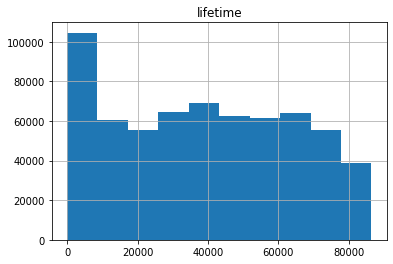

In [48]:
df_unique_post.hist('lifetime')